In [1]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, cm

from ipywidgets import StaticInteract, RadioWidget, RangeWidget
from scipy.interpolate import interp1d

In [2]:
rc('font',**{'size': 22})
rc('text', usetex=True)

In [3]:
def create_parameters_and_stables_files():

    os.system('mkdir results/')

    masses_directories = os.listdir('./particles/')

    with open('./results/parameters.txt', 'w') as outfile:
        outfile.write('m_ffp\tv_ffp\tb_ffp\tphi_bp\tinc_bp\tlan_bp\tap_bp\te_star_ffp\te_star_bp\tsma_star_ffp\tsma_star_bp\tinc_star_ffp\tinc_star_bp\tlan_star_ffp\tlan_star_bp\tap_star_ffp\tap_star_bp\trun_time\tenergy_change\tintegration_time\n')
        for i in range(len(masses_directories)):
            mass_dir = masses_directories[i]
            fname = './particles/'+mass_dir+'/parameters_'+mass_dir+'.txt'
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)
            infile.close()
    outfile.close()

    with open('./results/stables.txt', 'w') as outfile:
        outfile.write('m_ffp\tv_ffp\tb_ffp\tphi_bp\tinc_bp\tlan_bp\tap_bp\te_star_ffp\te_star_bp\tsma_star_ffp\tsma_star_bp\tinc_star_ffp\tinc_star_bp\tlan_star_ffp\tlan_star_bp\tap_star_ffp\tap_star_bp\trun_time\tenergy_change\tintegration_time\n')
        for i in range(len(masses_directories)):
            mass_dir = masses_directories[i]
            fname = './particles/'+mass_dir+'/stables_'+mass_dir+'.txt'
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)
            infile.close()
    outfile.close()

def read_parameters_df():

    df = pd.read_csv('./results/parameters.txt', sep='\t', dtype=np.float64)

    ms_ffp = df['m_ffp']
    vs_ffp = df['v_ffp']
    bs_ffp = df['b_ffp']

    return df, ms_ffp, vs_ffp, bs_ffp

def read_stables_df():

    df = pd.read_csv('./results/stables.txt', sep='\t', dtype=np.float64)

    ms_ffp = df['m_ffp']
    vs_ffp = df['v_ffp']
    bs_ffp = df['b_ffp']

    return df, ms_ffp, vs_ffp, bs_ffp
    
def create_plots_folders():
    os.system('mkdir plots/')

In [4]:
def calculate_cross_section(b_ffp_max, number_captures, number_total):
    
    cs = np.pi*b_ffp_max**2*number_captures/number_total
    
    return cs

In [5]:
#Parameters and Stables Files
create_parameters_and_stables_files()

#Read df
df, ms_ffp, vs_ffp, bs_ffp = read_stables_df()
df_par, ms_ffp_par, vs_ffp_par, bs_ffp_par = read_parameters_df()

ms_ffp_par_uniq = np.unique(ms_ffp_par)
vs_ffp_par_uniq = np.unique(vs_ffp_par)

print 'Stables: ', len(ms_ffp), '/', len(ms_ffp_par), '->', len(ms_ffp)*100/len(ms_ffp_par), '%'

#Plots
create_plots_folders()

Stables:  30142 / 1064000 -> 2 %


In [7]:
print len(vs_ffp_par_uniq)

print vs_ffp_par_uniq

critical_velocity = vs_ffp_par_uniq[0]*10.0/8.0

print critical_velocity

76
[ 2.336808  2.611325  2.91809   2.923932  2.937619  2.951306  2.965122
  2.978937  2.992882  3.006827  3.020902  3.034977  3.049184  3.063391
  3.077731  3.092072  3.106546  3.12102   3.13563   3.15024   3.164987
  3.179733  3.194618  3.209503  3.224527  3.239551  3.254716  3.26988
  3.285187  3.300494  3.315944  3.331394  3.346988  3.362583  3.378324
  3.394064  3.409952  3.42584   3.441877  3.457914  3.474101  3.490288
  3.506626  3.522965  3.539456  3.555948  3.572593  3.589239  3.606041
  3.622843  3.639802  3.65676   3.673878  3.690996  3.708274  3.725552
  3.742992  3.760431  3.778034  3.795638  3.813405  3.831173  3.849107
  3.867042  3.885144  3.903246  3.921517  3.939789  3.958231  3.976674
  3.995289  4.013905  4.032694  4.051484  4.070449  4.089415]
2.92101


In [8]:
def plot_cross_sections_vs_velocity(m_ffp_ind):
    
    m_ffp = ms_ffp_par_uniq[m_ffp_ind]
        
    vs_ffp_captured = np.array(vs_ffp)[np.where(ms_ffp == m_ffp)]
    bs_ffp_captured = np.array(bs_ffp)[np.where(ms_ffp == m_ffp)]

    vs_ffp_total = np.array(vs_ffp_par)[np.where(ms_ffp_par == m_ffp)]
    bs_ffp_total = np.array(bs_ffp_par)[np.where(ms_ffp_par == m_ffp)]
    
    x_axis = []
    y_axis = []
    y_axis_errors_up = []
    y_axis_errors_low = []
    
    unique_velocities, number_unique_velocities = np.unique(vs_ffp_total, return_counts=True)
    
    for uniq_vel in unique_velocities:
        
        indices_captured = np.where(vs_ffp_captured == uniq_vel)
        indices_total = np.where(vs_ffp_total == uniq_vel)
        bs_ffp_captured_for_v = bs_ffp_captured[indices_captured]
        
        if (len(bs_ffp_captured_for_v)==0):
            b_ffp_captured_for_v_max = 0.0
        else:
            b_ffp_captured_for_v_max = max(bs_ffp_captured_for_v)
        
        number_captures = len(indices_captured[0])      
        number_total = len(indices_total[0])
        cs = calculate_cross_section(b_ffp_captured_for_v_max, number_captures, number_total)
        
        if(cs != 0.0):
            log_cs = np.log10(cs)
            
            error_up = cs+cs/max(1.0,np.sqrt(number_captures))
            error_low = cs-cs/max(1.0,np.sqrt(number_captures))
            
            log_cs_error_up = np.log10(error_up)
            
            if(error_low != 0.0):
                log_cs_error_low = np.log10(error_low)
            else:
                log_cs_error_low = 0.0
            
            x_axis.append(uniq_vel)
            y_axis.append(log_cs)
            y_axis_errors_up.append(log_cs_error_up)
            y_axis_errors_low.append(log_cs_error_low)
            
    figure = plt.figure(figsize=(15,8))    
    fig = figure.add_subplot(1,1,1)
    
    m_ffp_string = r" ${0:.3f}$".format(m_ffp)
    
    fig.plot(x_axis, y_axis, c='m', marker='o', label='$m_{FFP}= $'+m_ffp_string+'$\mathrm{\quad (MJupiter)}$')
    fig.errorbar(x_axis, y_axis, xerr=None, yerr=[y_axis_errors_low, y_axis_errors_up], ecolor='black')
    fig.axvline(unique_velocities[0]*10.0/8.0, -10, 10, c='black', linestyle='--', alpha=0.6)
    
    fig.set_xlim(unique_velocities[0]*10.0/8.0,4.0)
    fig.set_ylim(-2.5, 6)
    
    fig.legend(fontsize=20)    
    fig.set_xlabel('$v_{FFP}\quad \mathrm{(km/s)}$', fontsize=30)
    fig.set_ylabel('$\log(\sigma_{capt}/\mathrm{AU}^2)$', fontsize=30) 
    
    plt.close(figure)
    
    return figure

In [9]:
StaticInteract(plot_cross_sections_vs_velocity, m_ffp_ind=RangeWidget(0,len(ms_ffp_par_uniq)-1,1))

In [10]:
def plot_cross_sections_vs_velocity_no_errbar(m_ffp_ind):
    
    m_ffp = ms_ffp_par_uniq[m_ffp_ind]
        
    vs_ffp_captured = np.array(vs_ffp)[np.where(ms_ffp == m_ffp)]
    bs_ffp_captured = np.array(bs_ffp)[np.where(ms_ffp == m_ffp)]

    vs_ffp_total = np.array(vs_ffp_par)[np.where(ms_ffp_par == m_ffp)]
    bs_ffp_total = np.array(bs_ffp_par)[np.where(ms_ffp_par == m_ffp)]
    
    x_axis = []
    y_axis = []
    
    unique_velocities, number_unique_velocities = np.unique(vs_ffp_total, return_counts=True)
    
    for uniq_vel in unique_velocities:
        
        indices_captured = np.where(vs_ffp_captured == uniq_vel)
        indices_total = np.where(vs_ffp_total == uniq_vel)
        bs_ffp_captured_for_v = bs_ffp_captured[indices_captured]
        
        if (len(bs_ffp_captured_for_v)==0):
            b_ffp_captured_for_v_max = 0.0
        else:
            b_ffp_captured_for_v_max = max(bs_ffp_captured_for_v)
        
        number_captures = len(indices_captured[0])      
        number_total = len(indices_total[0])
        cs = calculate_cross_section(b_ffp_captured_for_v_max, number_captures, number_total)
        
        if(cs != 0.0):
            log_cs = np.log10(cs)
            x_axis.append(uniq_vel)
            y_axis.append(log_cs)
            
    figure = plt.figure(figsize=(15,8))    
    fig = figure.add_subplot(1,1,1)
    
    m_ffp_string = r" ${0:.3f}$".format(m_ffp)
    
    fig.plot(x_axis, y_axis, c='m', marker='o', label='$m_{FFP}= $'+m_ffp_string+'$\mathrm{\quad (MJupiter)}$')
    fig.axvline(unique_velocities[0]*10.0/8.0, -10, 10, c='black', linestyle='--', alpha=0.6)
    
    fig.set_xlim(unique_velocities[0]*10.0/8.0,4.0)
    fig.set_ylim(-1.3, 3)
    
    fig.legend(fontsize=20)    
    fig.set_xlabel('$v_{FFP}\quad \mathrm{(km/s)}$', fontsize=30)
    fig.set_ylabel('$\log(\sigma_{capt}/\mathrm{AU}^2)$', fontsize=30) 
    
    plt.close(figure)
    
    return figure

In [11]:
StaticInteract(plot_cross_sections_vs_velocity_no_errbar, m_ffp_ind=RangeWidget(0,len(ms_ffp_par_uniq)-1,1))

In [12]:
def plot_cross_sections_vs_velocity_soften(m_ffp_ind):
    
    m_ffp = ms_ffp_par_uniq[m_ffp_ind]
        
    vs_ffp_captured = np.array(vs_ffp)[np.where(ms_ffp == m_ffp)]
    bs_ffp_captured = np.array(bs_ffp)[np.where(ms_ffp == m_ffp)]

    vs_ffp_total = np.array(vs_ffp_par)[np.where(ms_ffp_par == m_ffp)]
    bs_ffp_total = np.array(bs_ffp_par)[np.where(ms_ffp_par == m_ffp)]
    
    x_axis = []
    y_axis = []
    
    unique_velocities, number_unique_velocities = np.unique(vs_ffp_total, return_counts=True)
    
    for uniq_vel in unique_velocities:
        
        indices_captured = np.where(vs_ffp_captured == uniq_vel)
        indices_total = np.where(vs_ffp_total == uniq_vel)
        bs_ffp_captured_for_v = bs_ffp_captured[indices_captured]
        
        if (len(bs_ffp_captured_for_v)==0):
            b_ffp_captured_for_v_max = 0.0
        else:
            b_ffp_captured_for_v_max = max(bs_ffp_captured_for_v)
        
        number_captures = len(indices_captured[0])      
        number_total = len(indices_total[0])
        cs = calculate_cross_section(b_ffp_captured_for_v_max, number_captures, number_total)
        
        if(cs != 0.0):
            log_cs = np.log10(cs)
            x_axis.append(uniq_vel)
            y_axis.append(log_cs)
            
    figure = plt.figure(figsize=(15,8))    
    fig = figure.add_subplot(1,1,1)
    
    m_ffp_string = r" ${0:.3f}$".format(m_ffp)
    
    if(len(x_axis) != 0):
    
        softener = interp1d(x_axis, y_axis, kind='linear')
        new_x_axis = np.linspace(x_axis[0], x_axis[-1], 1000)
        new_y_axis = softener(new_x_axis)

        fig.plot(new_x_axis, new_y_axis, c='m', lw=2, label='$m_{FFP}= $'+m_ffp_string+'$\mathrm{\quad (MJupiter)}$')
    
    fig.axvline(unique_velocities[0]*10.0/8.0, -10, 10, c='black', linestyle='--', alpha=0.6)
    
    fig.set_xlim(unique_velocities[0]*10.0/8.0,4.1)
    fig.set_ylim(-1.3, 3)
    
    fig.legend(fontsize=20)    
    fig.set_xlabel('$v_{FFP}\quad \mathrm{(km/s)}$', fontsize=30)
    fig.set_ylabel('$\log(\sigma_{capt}/\mathrm{AU}^2)$', fontsize=30) 
    
    plt.close(figure)
    
    return figure

In [13]:
StaticInteract(plot_cross_sections_vs_velocity_soften, m_ffp_ind=RangeWidget(0,len(ms_ffp_par_uniq)-1,1))

/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:476: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [14]:
def plot_cross_sections_vs_velocity_soften_all(m_ffp_ind, figure, col):
    
    m_ffp = ms_ffp_par_uniq[m_ffp_ind]
        
    vs_ffp_captured = np.array(vs_ffp)[np.where(ms_ffp == m_ffp)]
    bs_ffp_captured = np.array(bs_ffp)[np.where(ms_ffp == m_ffp)]

    vs_ffp_total = np.array(vs_ffp_par)[np.where(ms_ffp_par == m_ffp)]
    bs_ffp_total = np.array(bs_ffp_par)[np.where(ms_ffp_par == m_ffp)]
    
    x_axis = []
    y_axis = []
    
    unique_velocities, number_unique_velocities = np.unique(vs_ffp_total, return_counts=True)
    
    for uniq_vel in unique_velocities:
        
        indices_captured = np.where(vs_ffp_captured == uniq_vel)
        indices_total = np.where(vs_ffp_total == uniq_vel)
        bs_ffp_captured_for_v = bs_ffp_captured[indices_captured]
        
        if (len(bs_ffp_captured_for_v)==0):
            b_ffp_captured_for_v_max = 0.0
        else:
            b_ffp_captured_for_v_max = max(bs_ffp_captured_for_v)
        
        number_captures = len(indices_captured[0])      
        number_total = len(indices_total[0])
        cs = calculate_cross_section(b_ffp_captured_for_v_max, number_captures, number_total)
        
        if(cs != 0.0):
            log_cs = np.log10(cs)
            x_axis.append(uniq_vel)
            y_axis.append(log_cs)
            
    fig = figure.add_subplot(1,1,1)
    
    m_ffp_string = r" ${0:.3f}$".format(m_ffp)
    
    if(len(x_axis) != 0):
    
        softener = interp1d(x_axis, y_axis, kind='linear')
        new_x_axis = np.linspace(x_axis[0], x_axis[-1], 1000)
        new_y_axis = softener(new_x_axis)

        fig.plot(new_x_axis, new_y_axis, c=col, lw=1, label='$m_{FFP}= $'+m_ffp_string+'$\mathrm{\quad (MJupiter)}$')
        
    return unique_velocities[0]*10.0/8.0

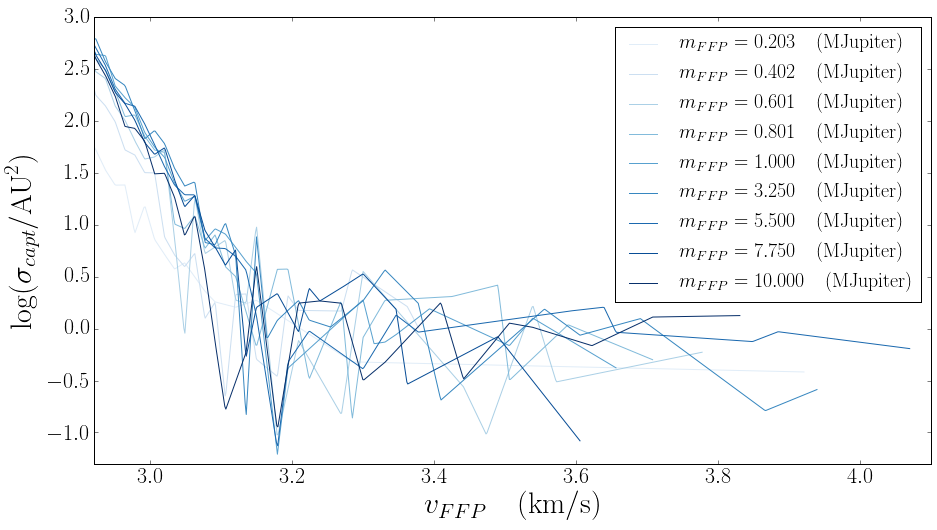

In [50]:
figure = plt.figure(figsize=(15,8))
color=iter(cm.Blues(np.linspace(0,1,10)))

for m_ffp_ind in range(10):
    vp = plot_cross_sections_vs_velocity_soften_all(m_ffp_ind, figure, next(color))
    
plt.xlim(vp,4.1)
plt.ylim(-1.3, 3)

plt.legend(fontsize=20)    
plt.xlabel('$v_{FFP}\quad \mathrm{(km/s)}$', fontsize=30)
plt.ylabel('$\log(\sigma_{capt}/\mathrm{AU}^2)$', fontsize=30)   
plt.savefig('plots/cs_blue.png')

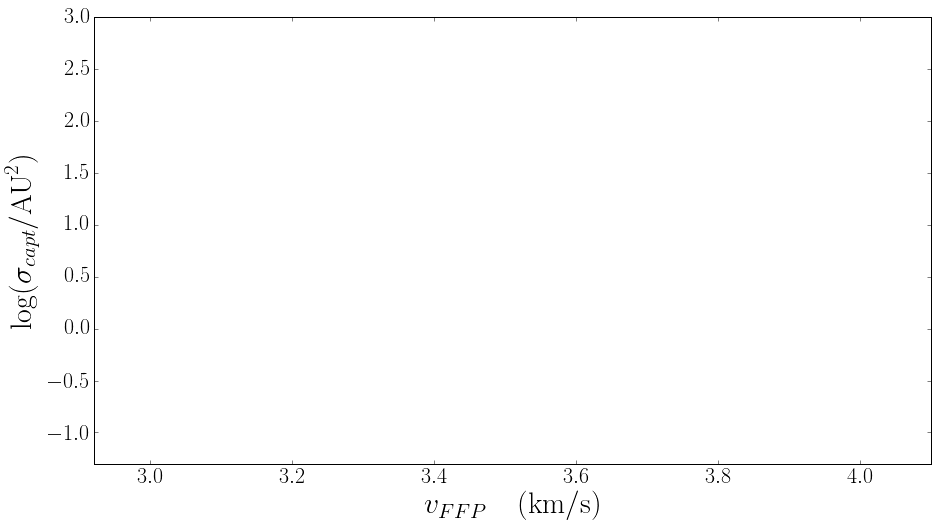

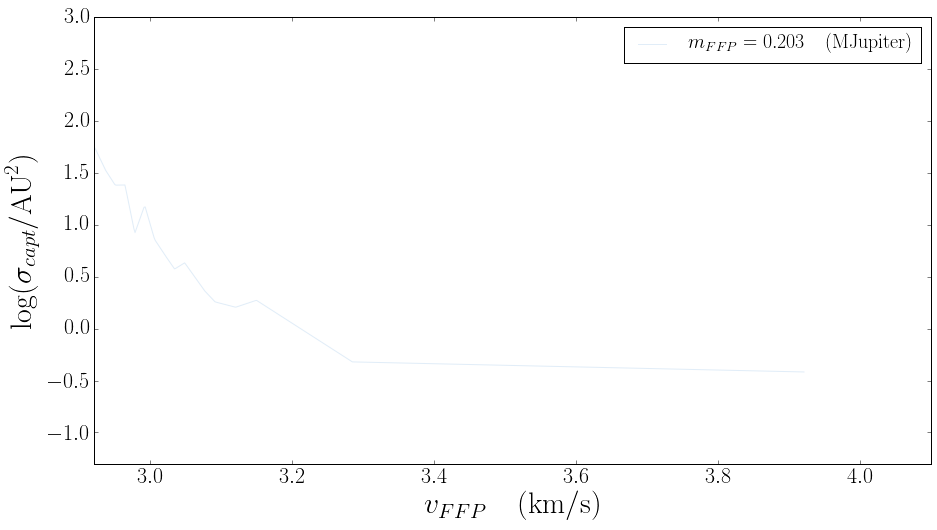

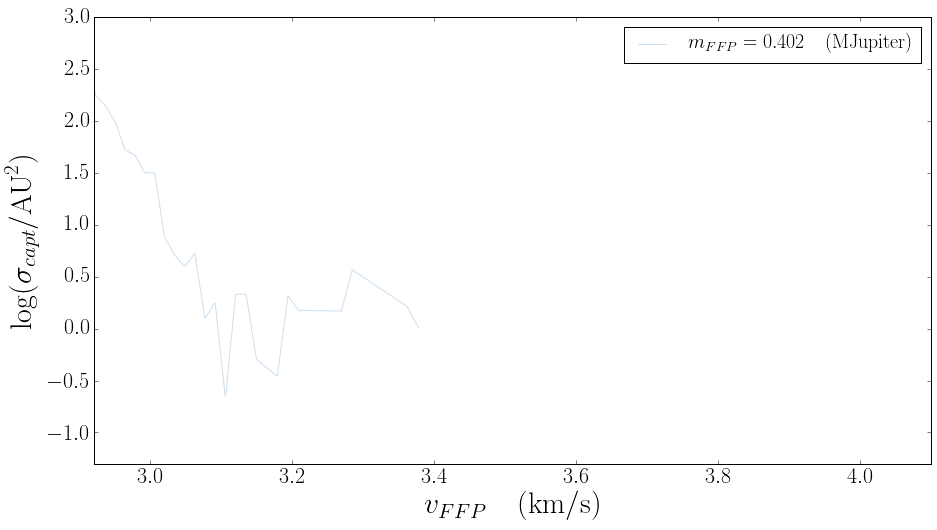

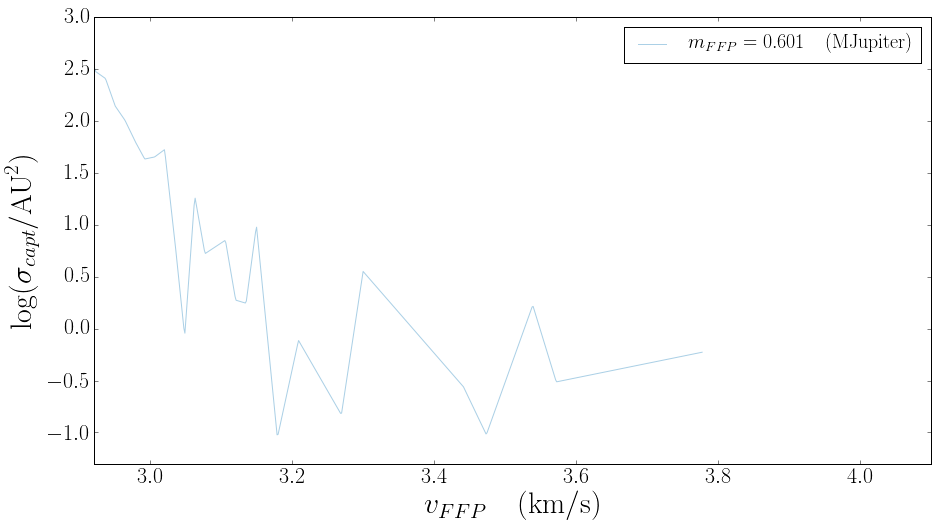

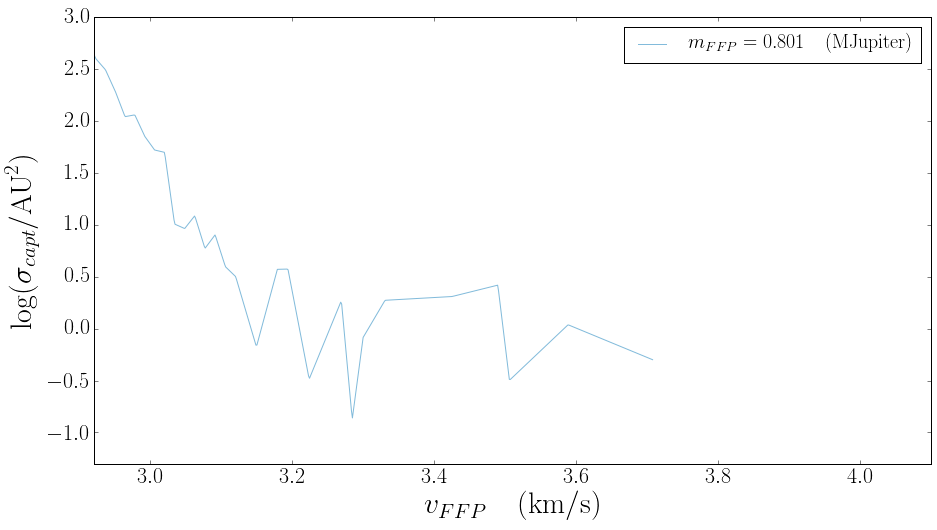

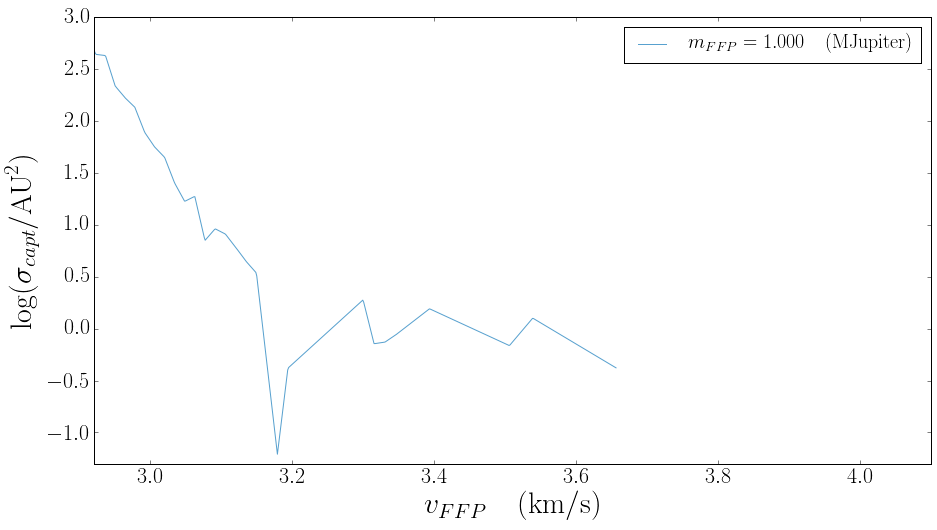

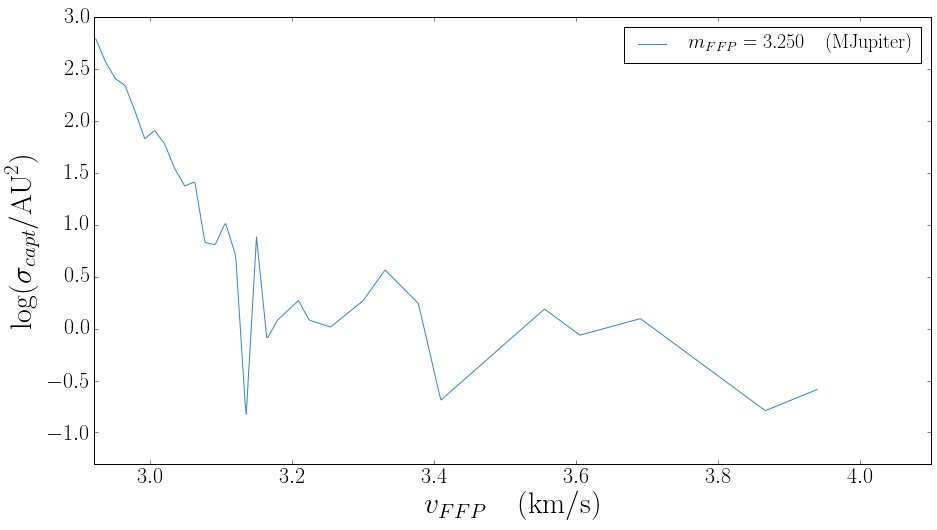

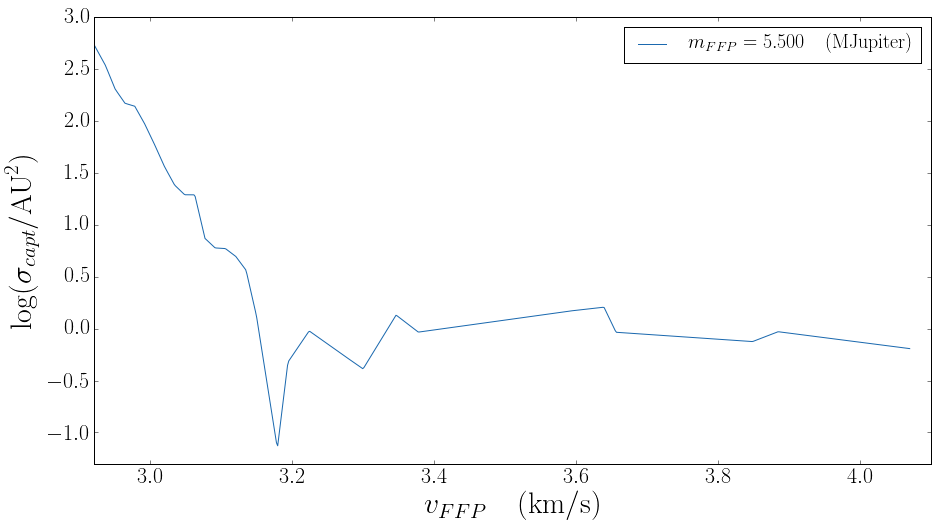

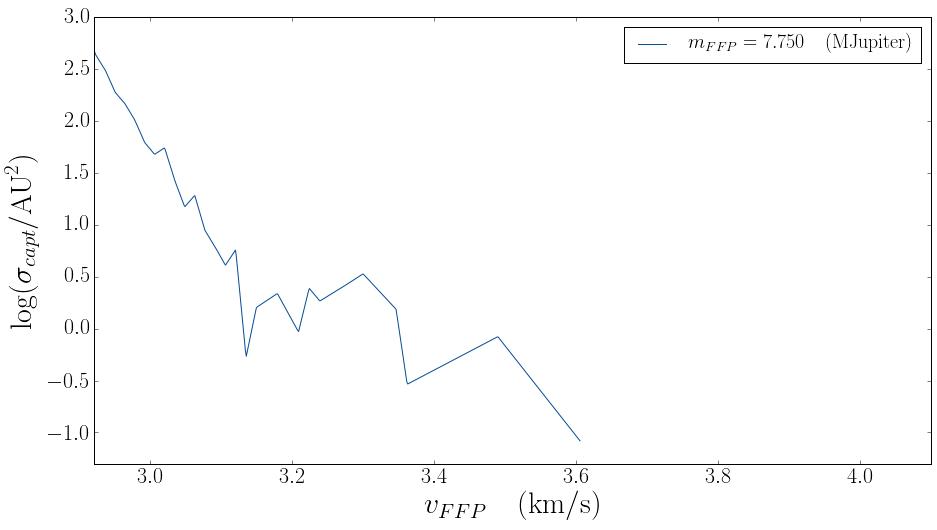

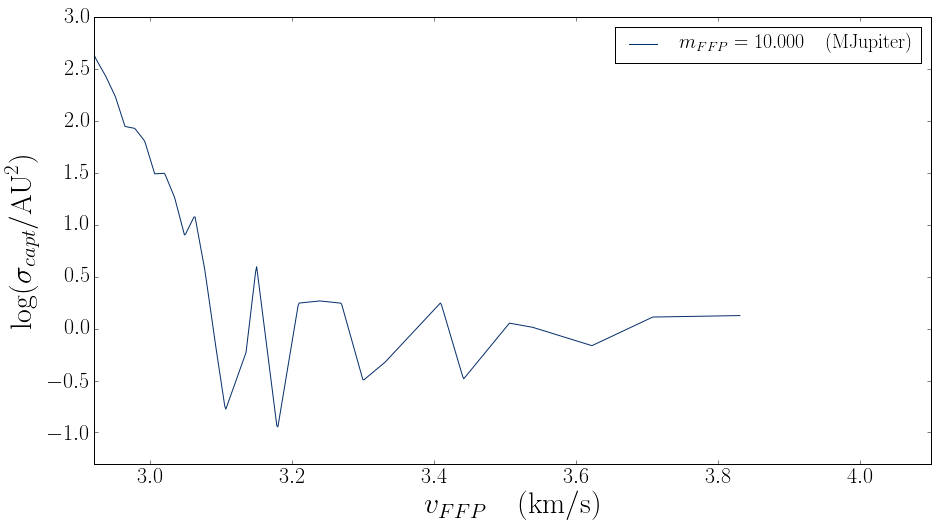

In [49]:
color=iter(cm.Blues(np.linspace(0,1,10)))

for m_ffp_ind in range(10):
    
    figure = plt.figure(figsize=(15,8))
    
    vp = plot_cross_sections_vs_velocity_soften_all(m_ffp_ind, figure, next(color))
    
    plt.xlim(2.92101,4.1)
    plt.ylim(-1.3, 3)

    plt.legend(fontsize=20)    
    plt.xlabel('$v_{FFP}\quad \mathrm{(km/s)}$', fontsize=30)
    plt.ylabel('$\log(\sigma_{capt}/\mathrm{AU}^2)$', fontsize=30)   
    plt.savefig('plots/'+str(m_ffp_ind)+'.png')